In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../data/dataset_buys _comp.csv')
df.head()

,Age,Income,Student,Credit_Rating,Buys_Computer
0,Tua,Tinggi,Ya,Buruk,0
1,Paruh Baya,Tinggi,Ya,Baik,1
2,Paruh Baya,Rendah,Tidak,Buruk,1
3,Tua,Rendah,Tidak,Baik,1
4,Tua,Rendah,Ya,Baik,1


In [14]:
X = df.drop(columns=['Buys_Computer'])
y = df['Buys_Computer']

In [15]:
X_encoded = pd.get_dummies(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [17]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.775
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66        71
           1       0.80      0.87      0.83       129

    accuracy                           0.78       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.77      0.78      0.77       200



In [25]:
with open("../results/classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

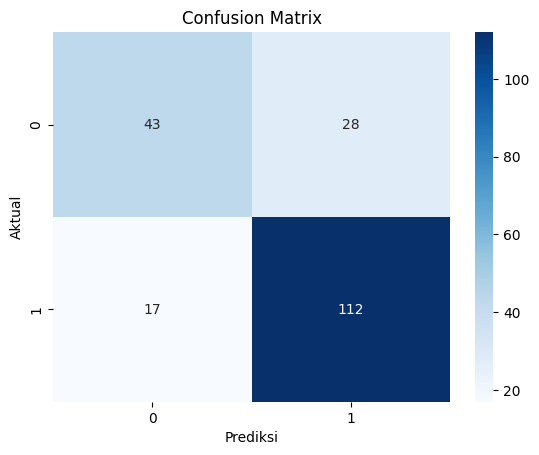

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()